In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import euclidean_distances

σ = torch.sigmoid

In [2]:
import sys
sys.path.append("../src/")

from prediction import (
    predict_1d
)

In [3]:
def interpolate_trajectory(df, columns=None, Δt=10):
    if columns is None:
        columns = ["x", "y", "z"]
        
    t = df.t
    x = df[columns]
    
    t_interp = np.arange(
        np.ceil(t.min()),
        t.max(),
        Δt,
        dtype=int
    )
    
    x_interp = interp1d(t, x, axis=0)(t_interp)
    
    result = pd.DataFrame(dict(zip(columns, x_interp.T)))
    result["t"] = t_interp
    
    return result

In [4]:
def predict_image(df, columns=None):
    if columns is None:
        columns = ["x", "y", "z"]
                   
    x = euclidean_distances(df_interp[columns]) / 100 / 1000
    x = torch.from_numpy(x)
    x = x.float()

    with torch.no_grad():
        y = model(x.unsqueeze(0).unsqueeze(0))
    y = y.squeeze()
    y = σ(y)
    y = y.numpy()
    
    return x, y

# Load model

In [5]:
filename_model = "../models/unet-latest.pt"
model = torch.jit.load(filename_model)
model.eval();

# Main

In [6]:
folder_trajectories = "/Volumes/samsung-T5/HPL/Ryan/jun4/times/trajectories"

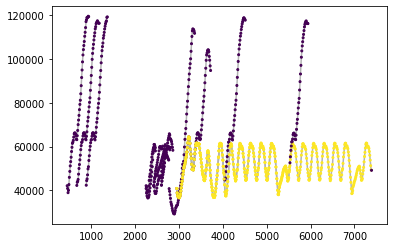

In [7]:
filenames = os.listdir(folder_trajectories)

suffix = "-rotor.csv"

for filename in filenames:
    
    if filename.endswith(suffix):
        continue
    
    filename_full = os.path.join(folder_trajectories, filename)
    df = pd.read_csv(filename_full)
    df.sort_values("t", inplace=True)
    df_interp = interpolate_trajectory(df)
    x, y = predict_image(df_interp)
    proba = predict_1d(y)
    df_interp["proba"] = proba
    
    # filename_save = filename_full.replace(".csv", suffix)
    # df_interp.to_csv(filename_save)
    
    plt.plot(df_interp.t, df_interp.x, zorder=-1, color="0.7")
    plt.scatter(df_interp.t, df_interp.x, c=df_interp.proba, s=4)
    # plt.show()